# K-means

In [2]:
# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Generate data

In [3]:
# Generate Data
points = np.vstack(((np.random.randn(150, 2) * 0.75 + np.array([1, 0])),
              (np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5])),
              (np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5]))))

In [4]:
points.shape

(250, 2)

### Main functions

In [91]:
def initialize_centroids(points, k):
    '''
        Selects k random points as initial
        points from dataset
    '''
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    '''
        Returns an array containing the index to the nearest centroid for each point
    '''
    dists = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(dists, axis=0)

def move_centroids(points, closest, centroids):
    '''
        Returns the new centroids assigned from the points closest to them
    '''
    return np.array([points[closest==k].mean(axis=0) for k in np.unique(closest)])

def main(points, k=3, iterations=100, accuracy=1e-15):
    
    # Initialize centroids
    centroids = initialize_centroids(points, k)
    
    # Run iterative process
    for i in range(iterations+1):
        closest = closest_centroid(points, centroids)
        new_centroids = move_centroids(points, closest, centroids)
        
        if np.all(np.sqrt(((new_centroids - centroids)**2).sum(axis=1)) <= accuracy):
            break
        centroids = new_centroids
        
    print(f'Iterations: {i}')
    return centroids

Iterations: 13


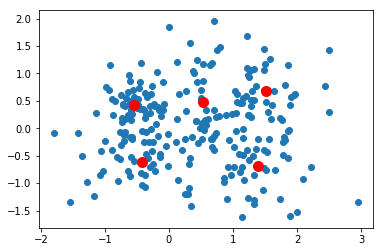

In [100]:
centroids = main(points, k=5)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
ax = plt.gca()